# 4. Modeling

In this Notebook, we address the classification problem using various machine learning algorithms while handling the highly imbalanced nature of the target variable. We evaluate the performance of each model and select the best-performing one for further analysis.

In a data science project, modeling is a pivotal phase that significantly contributes to the project's success. It serves as a bridge between the insights gained from exploratory data analysis (EDA) and the practical application of predictive analytics. Through modeling, we delve deeper into the dataset, uncovering intricate patterns, relationships, and trends that may not be readily discernible through initial data exploration alone.

The essence of modeling lies in its ability to harness the power of various machine learning algorithms to extract actionable insights and make accurate predictions. These algorithms encompass a wide range of techniques, from simple linear regression to complex ensemble methods, each tailored to address specific aspects of the data and the problem at hand.

In a classification problem characterized by a highly imbalanced target variable, effective modeling techniques are particularly crucial. Imbalance in the class distribution can skew the learning process of machine learning algorithms, leading to biased predictions and poor performance, especially for minority classes. Therefore, employing appropriate modeling strategies becomes imperative to accurately classify instances belonging to the minority class while maintaining overall predictive performance.

Through careful selection and tuning of machine learning algorithms, along with the implementation of advanced techniques such as data resampling and hyperparameter tuning, we strive to develop robust models capable of effectively handling class imbalance. These models not only enhance the predictive accuracy but also provide valuable insights into the underlying dynamics of the data, empowering stakeholders to make informed decisions and take proactive measures.

Outline of the notebook will be as written below:
- Model Selection
- Data Resampling
- Model Training
- Model Evaluation
- Hyperparameter Tuning


In [1]:
!pip install imblearn

In [1]:
import os
import warnings

import numpy as np

from IPython.display import clear_output

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

os.chdir("../")

from src import micro_modeling as modeling
from src import micro

%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore")
clear_output()

In [2]:
# Load the previously cleaned data
# train_df = micro.read_parquet_file(
#     dir_name="original_data", file_name="application_train"
# )
train_df = micro.read_parquet_file(
    dir_name="cleaned_data", file_name="cleaned_train_data"
)
test_df = micro.read_parquet_file(
    dir_name="cleaned_data", file_name="cleaned_test_data"
)

In [3]:
X = train_df.drop(columns=["TARGET"]).values
y = train_df["TARGET"].values

## 4.1 Model Selection

We consider a range of machine learning algorithms suitable for imbalanced classification problems, including but not limited to:

- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machines (with class weights or oversampling techniques)
- Ensemble methods (such as Bagging and Boosting)

The selection of models is based on their ability to handle class imbalance, interpretability, and computational efficiency.

We will evaluate all the models against each other later to see which one has the better performance for this dataset.

But at first we need to handle the severe imbalance we have in the `TARGET` with data resampling


## 4.2 Data Resampling

Given the highly imbalanced nature of the target variable, we employ data resampling techniques to address class imbalance. There are some techniques that could help us in achieveing these:

- Oversampling of the minority class (e.g., using SMOTE or ADASYN)
- Undersampling of the majority class
- Synthetic data generation
- Ensemble methods (such as EasyEnsemble or BalancedBaggingClassifier)

We try the first method which is SMOTE here in order to see if we can get a good result with it or not. Also we will undersample the majority class.

First We use Oversampling to repopulate the minority class and then undersample the majority class to make their distribution close to each other.

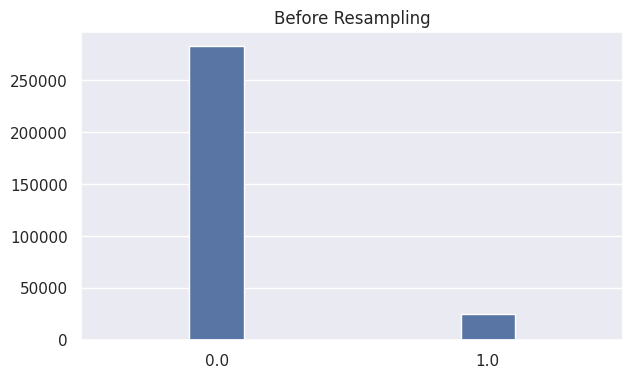

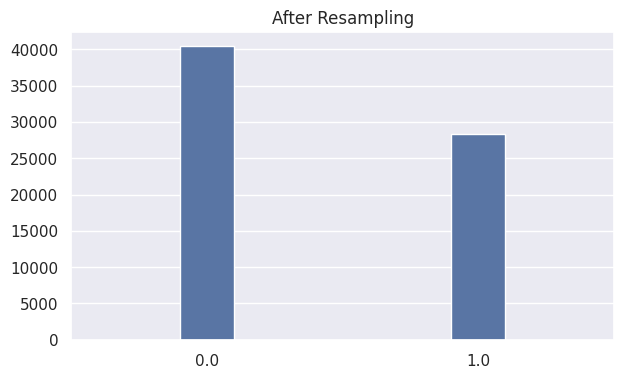

In [4]:
modeling.target_distribution_pie(y, "Before Resampling")
X, y = modeling.resample_train_data(X, y)
modeling.target_distribution_pie(y, "After Resampling")

After resampling we need to select a model to train and evaluate. Here we have a selection of models which we need to train.

In order to find out which model has a better performance, First we define our models and then use the cross validation technique in order to find the model with the best score.

After finding the model with the best score we use the training data to train the selected model.

Here our Model Training and evaluation are merged into each other.

## 4.3 Model Training

We split the preprocessed dataset into training and testing sets with a ratio of 70-30. The training set is used to train the models, while the testing set is used for model evaluation. Also we will use the StratifiedKFold splitting in order to make sure that the imbalance in the `TARGET` won't affect the training so much.

We train each selected model using the resampled training dataset and assess their performance using appropriate evaluation metrics.



In [6]:
X_train, X_test, y_train, y_test = modeling.split_train_data(X, y, train_ratio=0.7)

In [9]:
print(
    f"train X shape is : {X_train.shape}\n",
    f"train y shape is : {y_train.shape}\n",
    f"test X shape is : {X_test.shape}\n",
    f"test y shape is : {y_test.shape}",
)

train X shape is : (48055, 139)
 train y shape is : (48055,)
 test X shape is : (20595, 139)
 test y shape is : (20595,)


## 4.4 Model Evaluation

The evaluation metrics that are suitable for testing the performance of each model for in=mbalanced data are as below:

- Precision, Recall, F1-score, and ROC AUC
- Average Precision (AP) and Area under Precision-Recall Curve (PR AUC)
- Confusion matrices with emphasis on true positive and false positive rates

For this dataset we consider the ROC AUC evaluation metric with cross validation in order to compare the models performance.

Additionally, we visualize the model's performance using:

- Precision-Recall curves
- ROC curves
- Confusion matrices
- Calibration plots

We do the Model training and evaluation with each other using the Cross validation scoring of the sklearn library.

In [ ]:
# Define models list
models = [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, SVC]

scores_df = modeling.evaluate_models(X_train, y_train, models)
print(scores_df)

                               0
DecisionTreeClassifier  0.604445
RandomForestClassifier  0.760669
LogisticRegression      0.615612
SVC                          NaN


## 4.5 Hyperparameter Tuning

We conduct hyperparameter tuning to optimize the performance of the selected models, considering their ability to handle class imbalance. This involves:

- Performing grid search or randomized search over a range of hyperparameters.
- Using stratified cross-validation to maintain the class distribution during hyperparameter tuning.
- Tuning hyperparameters based on performance metrics such as F1-score, ROC AUC, or average precision.

## 4.6 Model Selection and Interpretation

Based on the evaluation results, we select the best-performing model for further analysis. We interpret the model's coefficients, feature importance scores, and other relevant factors to understand the underlying relationships captured by the model.

## 4.7 Model Validation

Finally, we validate the selected model using the testing dataset to ensure its generalization performance. We assess the model's performance on unseen data and compare it with the training performance to check for overfitting or underfitting.

---